Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4977 - accuracy: 0.8273
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3757 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3349 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3124 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2949 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2806 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2692 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2579 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2467 - accuracy: 0.9062
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3225 

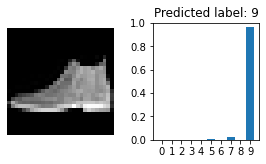

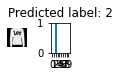

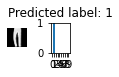

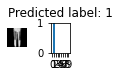

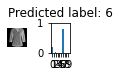

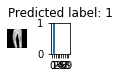

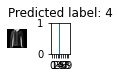

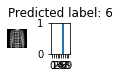

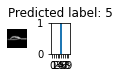

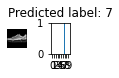

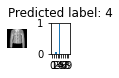

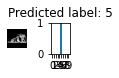

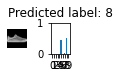

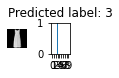

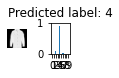

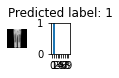

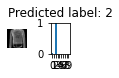

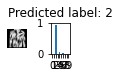

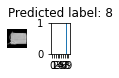

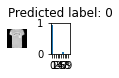

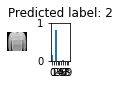

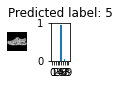

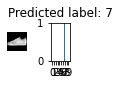

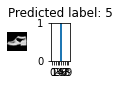

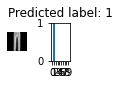

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the model
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([layers.Flatten(input_shape=(28, 28)),
                           layers.Dense(128, activation='relu'),
                           layers.Dense(10, activation='softmax')])

# Compile the model
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10)

#Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Make predictions
predictions = model.predict(test_images) 
predicted_labels =np.argmax(predictions, axis=1)

# Show some example images and their predicted labels
num_rows = 5
num_cols = 5

num_images = num_rows * num_cols 
plt.figure(figsize=(2 * 2 *num_cols, 2 * num_rows))

for i in range(num_images):
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1) 
    plt.imshow(test_images[i], cmap='gray')
    plt.axis('off')
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2) 
    plt.bar(range(10),predictions[i]) 
    plt.xticks(range(10))
    plt.ylim([0, 1])
    plt.tight_layout()
    plt.title(f"Predicted label: {predicted_labels[i]}")
    plt.show()